In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df = pd.read_csv("D:\data prep\dseb63_final_project_DP_dataset\dseb63_final_project_DP_dataset\dseb63_bureau.csv")
df.head()

,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,SK_ID_CURR
0,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN,254629
1,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN,254629
2,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN,254629
3,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN,254629
4,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN,254629


# TABLE DESCRIPTION

In [49]:
description = pd.read_csv('D:\data prep\project data\dseb63_columns_description.csv',encoding='latin',index_col=0)
description = description[description['Table'].str.contains('bureau')].drop(columns = 'Table',axis = 0).set_index("Row")
description

,Description,Special
Row,,
SK_ID_CURR,ID of loan in our sample - one loan in our sam...,hashed
SK_BUREAU_ID,Recoded ID of previous Credit Bureau credit re...,hashed
CREDIT_ACTIVE,Status of the Credit Bureau (CB) reported credits,NaN
CREDIT_CURRENCY,Recoded currency of the Credit Bureau credit,recoded
DAYS_CREDIT,How many days before current application did c...,time only relative to the application
CREDIT_DAY_OVERDUE,Number of days past due on CB credit at the ti...,NaN
DAYS_CREDIT_ENDDATE,Remaining duration of CB credit (in days) at t...,time only relative to the application
DAYS_ENDDATE_FACT,Days since CB credit ended at the time of appl...,time only relative to the application
AMT_CREDIT_MAX_OVERDUE,Maximal amount overdue on the Credit Bureau cr...,NaN


# CHECK NULL

In [50]:
number_missing = df.isnull().sum()
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'number_missing' : number_missing,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,number_missing,percent_missing
SK_ID_BUREAU,SK_ID_BUREAU,0,0.000000
CREDIT_ACTIVE,CREDIT_ACTIVE,0,0.000000
CREDIT_CURRENCY,CREDIT_CURRENCY,0,0.000000
DAYS_CREDIT,DAYS_CREDIT,0,0.000000
CREDIT_DAY_OVERDUE,CREDIT_DAY_OVERDUE,0,0.000000
DAYS_CREDIT_ENDDATE,DAYS_CREDIT_ENDDATE,89098,6.080426
DAYS_ENDDATE_FACT,DAYS_ENDDATE_FACT,544673,37.170798
AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_MAX_OVERDUE,948545,64.732738
CNT_CREDIT_PROLONG,CNT_CREDIT_PROLONG,0,0.000000
AMT_CREDIT_SUM,AMT_CREDIT_SUM,3,0.000205


In [51]:
columns = df.loc[:,(df.isnull().sum(axis = 0) / df.shape[0]) >= 0.9].columns
columns

Index([], dtype='object')

### I didn't find any column with >90%null. So removing is not necessary

# CHECK OUTLIERS

<Axes: ylabel='SK_ID_BUREAU'>

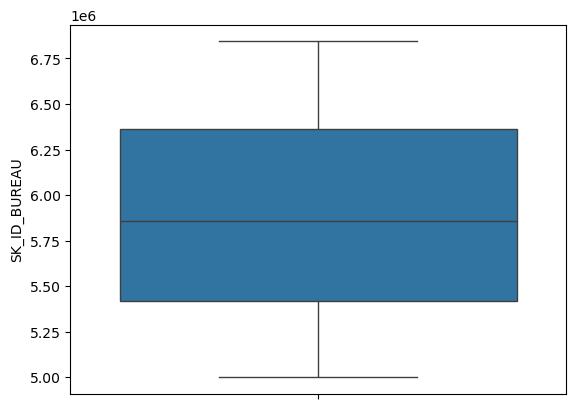

In [52]:
sns.boxplot(df['SK_ID_BUREAU'])

<Axes: ylabel='CREDIT_ACTIVE'>

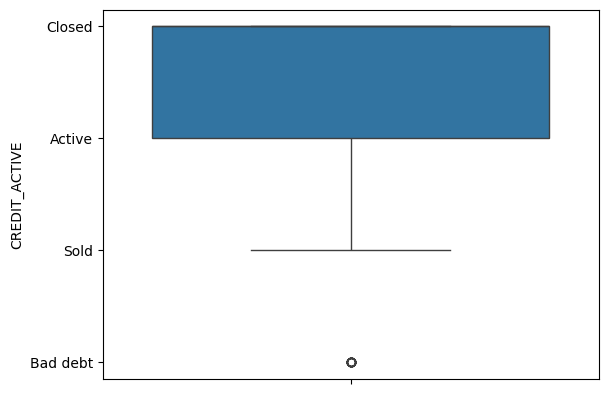

In [53]:
sns.boxplot(df['CREDIT_ACTIVE'])

<Axes: ylabel='CREDIT_CURRENCY'>

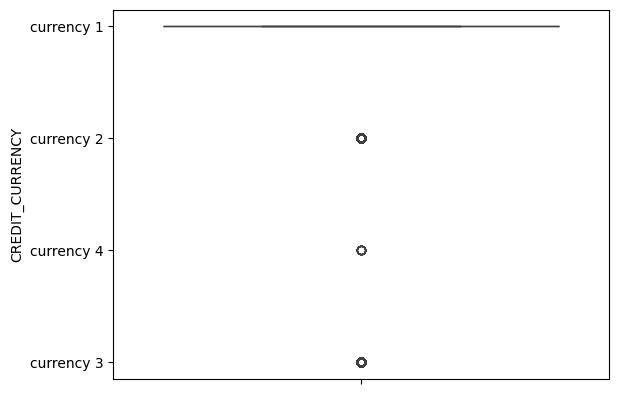

In [54]:
sns.boxplot(df['CREDIT_CURRENCY'])

<Axes: ylabel='DAYS_CREDIT'>

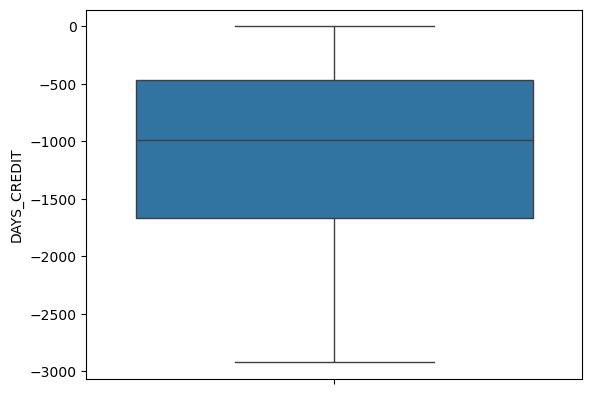

In [55]:
sns.boxplot(df['DAYS_CREDIT'])

<Axes: ylabel='CREDIT_DAY_OVERDUE'>

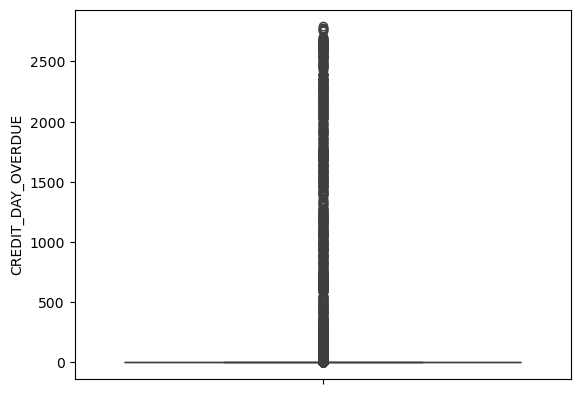

In [56]:
sns.boxplot(df['CREDIT_DAY_OVERDUE'])

<Axes: ylabel='DAYS_CREDIT_ENDDATE'>

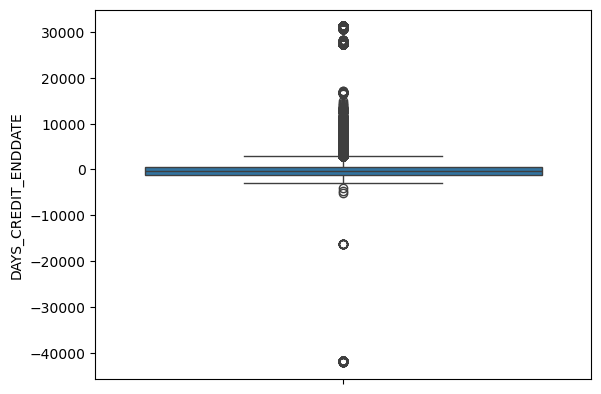

In [57]:
sns.boxplot(df['DAYS_CREDIT_ENDDATE'])

<Axes: ylabel='DAYS_ENDDATE_FACT'>

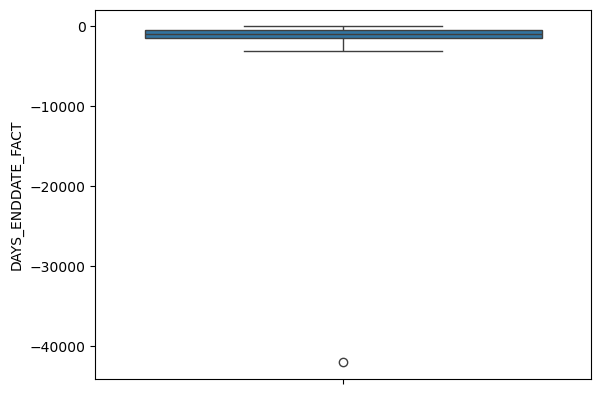

In [58]:
sns.boxplot(df['DAYS_ENDDATE_FACT'])

<Axes: ylabel='AMT_CREDIT_MAX_OVERDUE'>

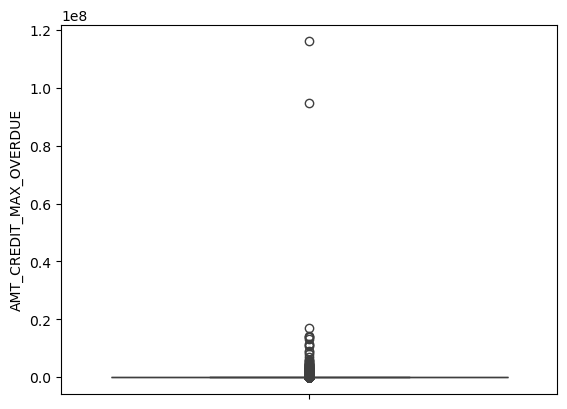

In [59]:
sns.boxplot(df['AMT_CREDIT_MAX_OVERDUE'])

<Axes: ylabel='CNT_CREDIT_PROLONG'>

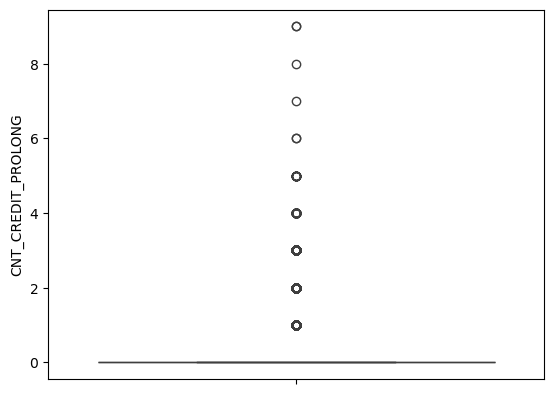

In [60]:
sns.boxplot(df['CNT_CREDIT_PROLONG'])

<Axes: ylabel='AMT_CREDIT_SUM'>

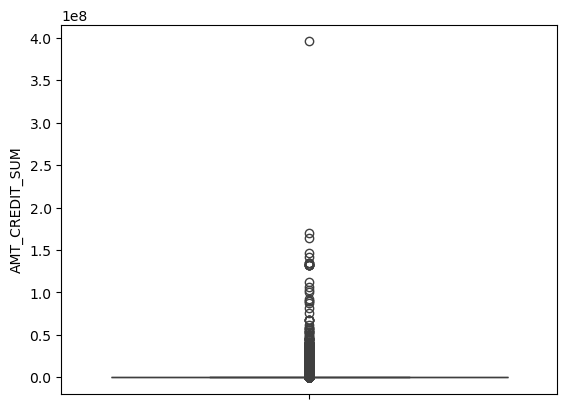

In [61]:
sns.boxplot(df['AMT_CREDIT_SUM'])

<Axes: ylabel='AMT_CREDIT_SUM_DEBT'>

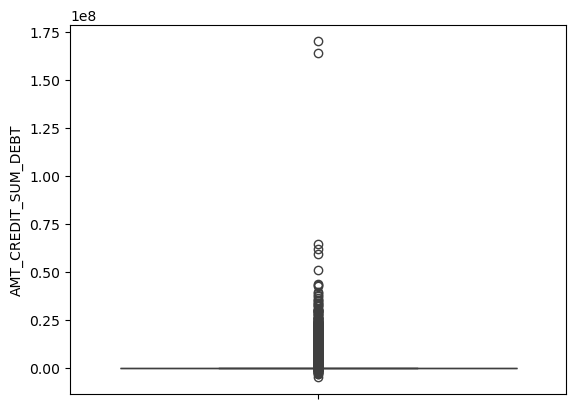

In [62]:
sns.boxplot(df['AMT_CREDIT_SUM_DEBT'])

<Axes: ylabel='AMT_CREDIT_SUM_LIMIT'>

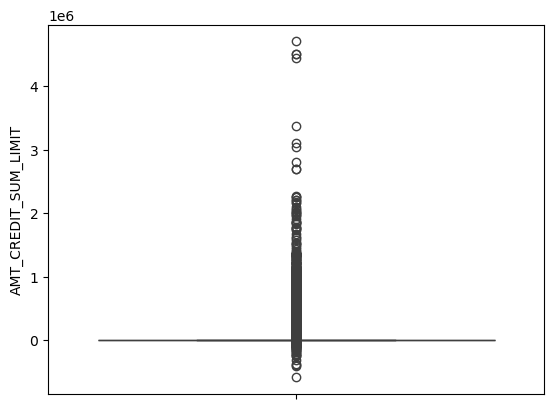

In [63]:
sns.boxplot(df['AMT_CREDIT_SUM_LIMIT'])

<Axes: ylabel='AMT_CREDIT_SUM_OVERDUE'>

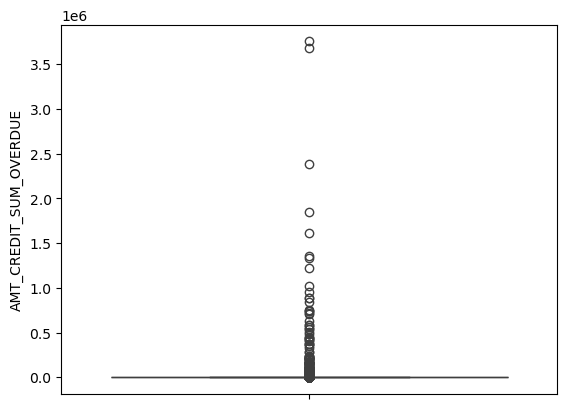

In [64]:
sns.boxplot(df['AMT_CREDIT_SUM_OVERDUE'])

<Axes: ylabel='CREDIT_TYPE'>

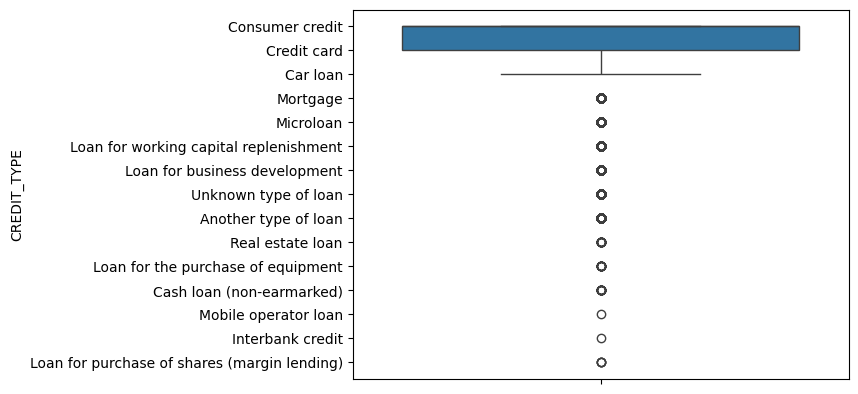

In [65]:
sns.boxplot(df['CREDIT_TYPE'])

<Axes: ylabel='DAYS_CREDIT_UPDATE'>

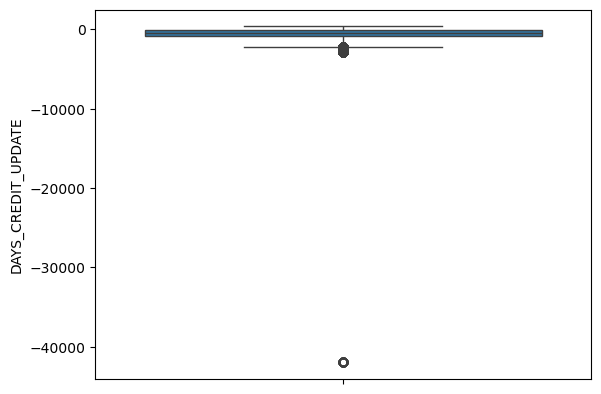

In [66]:
sns.boxplot(df['DAYS_CREDIT_UPDATE'])

<Axes: ylabel='AMT_ANNUITY'>

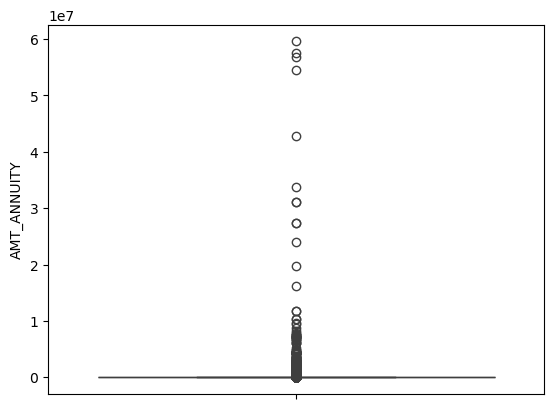

In [67]:
sns.boxplot(df['AMT_ANNUITY'])

# CHECK VALID

In [68]:
numerical_data = df._get_numeric_data()

In [69]:
for column in numerical_data.columns:
    great0 = df[column][df[column] > 0].count()
    equal0 =  df[column][df[column] == 0].count()
    small0 = df[column][df[column] < 0].count()
    nan_total = df[column].isnull().sum()
    other_value = df.shape[0] - great0 - small0 - nan_total - equal0
    print(f'{column} has  >0: {value_counts[">0"]}, =0: {value_counts["=0"]}, <0: {value_counts["<0"]}, nan: {nan_total}, other values: {other_value}')

SK_ID_BUREAU has  >0: 369161, =0: 817282, <0: 278882, nan: 0, other values: 0
DAYS_CREDIT has  >0: 369161, =0: 817282, <0: 278882, nan: 0, other values: 0
CREDIT_DAY_OVERDUE has  >0: 369161, =0: 817282, <0: 278882, nan: 0, other values: 0
DAYS_CREDIT_ENDDATE has  >0: 369161, =0: 817282, <0: 278882, nan: 89098, other values: 0
DAYS_ENDDATE_FACT has  >0: 369161, =0: 817282, <0: 278882, nan: 544673, other values: 0
AMT_CREDIT_MAX_OVERDUE has  >0: 369161, =0: 817282, <0: 278882, nan: 948545, other values: 0
CNT_CREDIT_PROLONG has  >0: 369161, =0: 817282, <0: 278882, nan: 0, other values: 0
AMT_CREDIT_SUM has  >0: 369161, =0: 817282, <0: 278882, nan: 3, other values: 0
AMT_CREDIT_SUM_DEBT has  >0: 369161, =0: 817282, <0: 278882, nan: 223094, other values: 0
AMT_CREDIT_SUM_LIMIT has  >0: 369161, =0: 817282, <0: 278882, nan: 489670, other values: 0
AMT_CREDIT_SUM_OVERDUE has  >0: 369161, =0: 817282, <0: 278882, nan: 0, other values: 0
DAYS_CREDIT_UPDATE has  >0: 369161, =0: 817282, <0: 278882

In [70]:
categorical_data = df.drop(columns=numerical_data.columns)

In [71]:
for column in categorical_data.columns:
    unique_values = categorical_data[column].unique()
    print(f'col {column} : {list(unique_values)}\n')

col CREDIT_ACTIVE : ['Closed', 'Active', 'Sold', 'Bad debt']

col CREDIT_CURRENCY : ['currency 1', 'currency 2', 'currency 4', 'currency 3']

col CREDIT_TYPE : ['Consumer credit', 'Credit card', 'Car loan', 'Mortgage', 'Microloan', 'Loan for working capital replenishment', 'Loan for business development', 'Unknown type of loan', 'Another type of loan', 'Real estate loan', 'Loan for the purchase of equipment', 'Cash loan (non-earmarked)', 'Mobile operator loan', 'Interbank credit', 'Loan for purchase of shares (margin lending)']



# CHECK DISTRIBUTION OF CATEGORICAL

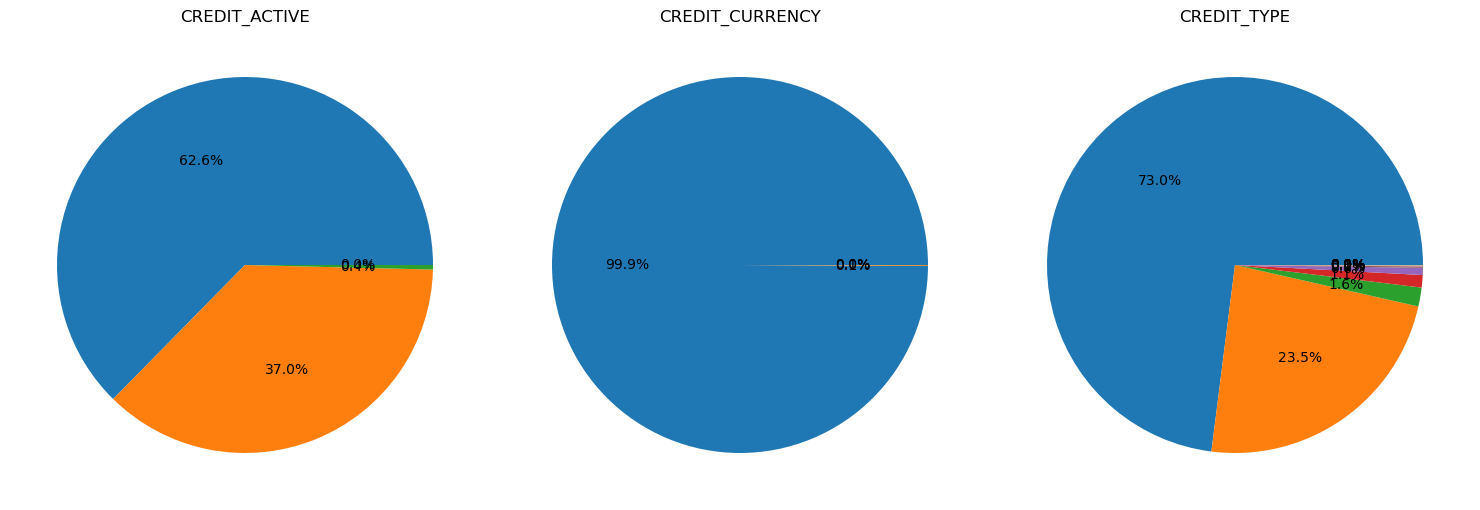

In [72]:
columns = categorical_data.columns

num_rows = 1
num_cols = len(columns)

fig, ax = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5))

column_index = 0

for col in range(num_cols):
    sizes = categorical_data[columns[column_index]].value_counts(normalize=True)
    ax[col].pie(sizes, autopct='%1.1f%%')
    ax[col].set_title(columns[column_index], color='black')
    column_index += 1

plt.tight_layout()

plt.show()

In [73]:
for col in range(num_cols):
    column_name = columns[col]
    sizes = categorical_data[column_name].value_counts(normalize=True)
    
    print(f"\nInsights for {column_name}:")
    
    for category, percentage in sizes.iteritems():
        print(f"{category}: {percentage * 100:.2f}%")
    
    print(f"Total Unique Categories: {len(sizes)}")


Insights for CREDIT_ACTIVE:
Closed: 62.63%
Active: 36.98%
Sold: 0.39%
Bad debt: 0.00%
Total Unique Categories: 4

Insights for CREDIT_CURRENCY:
currency 1: 99.92%
currency 2: 0.07%
currency 3: 0.01%
currency 4: 0.00%
Total Unique Categories: 4

Insights for CREDIT_TYPE:
Consumer credit: 72.99%
Credit card: 23.47%
Car loan: 1.62%
Mortgage: 1.07%
Microloan: 0.61%
Loan for business development: 0.12%
Another type of loan: 0.06%
Unknown type of loan: 0.03%
Loan for working capital replenishment: 0.03%
Real estate loan: 0.00%
Cash loan (non-earmarked): 0.00%
Loan for the purchase of equipment: 0.00%
Loan for purchase of shares (margin lending): 0.00%
Mobile operator loan: 0.00%
Interbank credit: 0.00%
Total Unique Categories: 15


C:\Users\Admin\AppData\Local\Temp\ipykernel_12380\2950117082.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for category, percentage in sizes.iteritems():
C:\Users\Admin\AppData\Local\Temp\ipykernel_12380\2950117082.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for category, percentage in sizes.iteritems():
C:\Users\Admin\AppData\Local\Temp\ipykernel_12380\2950117082.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for category, percentage in sizes.iteritems():


### Followed this chart, we can see that CREDIT_CURRENCY have signigicant difference between each value -> we can drop this column

# CREATE CORRELATION MATRIX

In [75]:
correlation_matrix = df.corr()
correlation_matrix

C:\Users\Admin\AppData\Local\Temp\ipykernel_12380\868109210.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,SK_ID_CURR
SK_ID_BUREAU,1.000000,0.014469,-0.001878,0.009412,0.017923,0.002837,0.002658,0.008040,0.006045,-0.003956,-0.000491,0.018640,0.002711,-0.003786
DAYS_CREDIT,0.014469,1.000000,-0.028343,0.231075,0.875291,-0.014414,-0.032111,0.055663,0.136678,0.024584,-0.000603,0.683189,0.000144,0.001774
CREDIT_DAY_OVERDUE,-0.001878,-0.028343,1.000000,-0.007540,-0.008780,0.001240,0.002809,-0.003627,-0.002552,-0.000310,0.095782,-0.018188,-0.000408,0.000059
DAYS_CREDIT_ENDDATE,0.009412,0.231075,-0.007540,1.000000,0.254893,0.000783,0.122179,0.060284,0.081933,0.088553,0.001136,0.247783,0.000200,0.000344
DAYS_ENDDATE_FACT,0.017923,0.875291,-0.008780,0.254893,1.000000,0.001590,0.013073,0.069940,0.024774,0.019586,-0.000363,0.745192,0.003171,0.002362
AMT_CREDIT_MAX_OVERDUE,0.002837,-0.014414,0.001240,0.000783,0.001590,1.000000,0.001483,0.085068,0.013129,0.000185,0.015068,-0.000620,0.001357,0.000246
CNT_CREDIT_PROLONG,0.002658,-0.032111,0.002809,0.122179,0.013073,0.001483,1.000000,-0.009257,-0.001271,0.076587,-0.000009,0.018988,-0.000663,0.000134
AMT_CREDIT_SUM,0.008040,0.055663,-0.003627,0.060284,0.069940,0.085068,-0.009257,1.000000,0.667766,0.003508,0.006779,0.111934,0.051585,-0.001292
AMT_CREDIT_SUM_DEBT,0.006045,0.136678,-0.002552,0.081933,0.024774,0.013129,-0.001271,0.667766,1.000000,-0.019174,0.007909,0.139080,0.016077,-0.000788
AMT_CREDIT_SUM_LIMIT,-0.003956,0.024584,-0.000310,0.088553,0.019586,0.000185,0.076587,0.003508,-0.019174,1.000000,-0.000711,0.041893,0.003674,0.000932


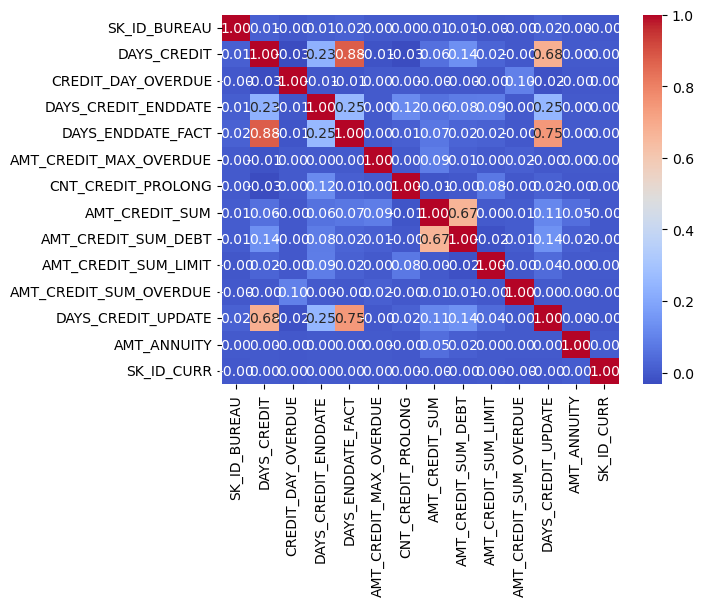

In [76]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [77]:
max_corr = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()
print("Các cặp features có correlation cao nhất:\n", max_corr.head())

Các cặp features có correlation cao nhất:
 SK_ID_BUREAU       SK_ID_BUREAU           1.000000
DAYS_ENDDATE_FACT  DAYS_CREDIT            0.875291
                   DAYS_CREDIT_UPDATE     0.745192
DAYS_CREDIT        DAYS_CREDIT_UPDATE     0.683189
AMT_CREDIT_SUM     AMT_CREDIT_SUM_DEBT    0.667766
dtype: float64


DAYS_ENDDATE_FACT and DAYS_CREDIT, DAYS_CREDIT_UPDATE columns have high correlation -> two of them can be dropped

# DROP AND ADD COLUMNS

In [78]:
new_df = df.drop(columns=['CREDIT_CURRENCY','DAYS_ENDDATE_FACT','DAYS_CREDIT_UPDATE'])
# Thêm cột mới AMT_CREDIT_SUM_DEBT_RATIO để rút ra được tỉ lệ giữa nợ hiện tại và tổng số tiền tín dụng
# thể hiện gánh nặng tài chính đối với người đề nghị vay.
new_df['AMT_CREDIT_SUM_DEBT_RATIO'] = new_df['AMT_CREDIT_SUM_DEBT'] / new_df['AMT_CREDIT_SUM']

new_df.head()

,SK_ID_BUREAU,CREDIT_ACTIVE,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,AMT_ANNUITY,SK_ID_CURR,AMT_CREDIT_SUM_DEBT_RATIO
0,5714462,Closed,-497,0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,NaN,254629,0.00000
1,5714463,Active,-208,0,1075.0,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,NaN,254629,0.76152
2,5714464,Active,-203,0,528.0,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,NaN,254629,NaN
3,5714465,Active,-203,0,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,NaN,254629,NaN
4,5714466,Active,-629,0,1197.0,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,NaN,254629,NaN


# MERGE WITH TARGET TABLE

In [79]:
df2 = pd.read_csv("D:\data prep\dseb63_final_project_DP_dataset\dseb63_final_project_DP_dataset\dseb63_application_train.csv")
df2 = df2[['SK_ID_CURR','TARGET']]
df2.head()

,SK_ID_CURR,TARGET
0,278621,0
1,139008,0
2,138348,0
3,64140,0
4,219374,0


In [80]:
merge_table = pd.merge(new_df, df2, on='SK_ID_CURR', how='left')
merge_table.head()

,SK_ID_BUREAU,CREDIT_ACTIVE,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,AMT_ANNUITY,SK_ID_CURR,AMT_CREDIT_SUM_DEBT_RATIO,TARGET
0,5714462,Closed,-497,0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,NaN,254629,0.00000,0.0
1,5714463,Active,-208,0,1075.0,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,NaN,254629,0.76152,0.0
2,5714464,Active,-203,0,528.0,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,NaN,254629,NaN,0.0
3,5714465,Active,-203,0,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,NaN,254629,NaN,0.0
4,5714466,Active,-629,0,1197.0,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,NaN,254629,NaN,0.0


# CHECK DISTRIBUTION OF NUMERICAL

In [83]:
numerical_data = new_df._get_numeric_data()
numerical_data.columns

Index(['SK_ID_BUREAU', 'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE',
       'DAYS_CREDIT_ENDDATE', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'AMT_ANNUITY', 'SK_ID_CURR',
       'AMT_CREDIT_SUM_DEBT_RATIO'],
      dtype='object')

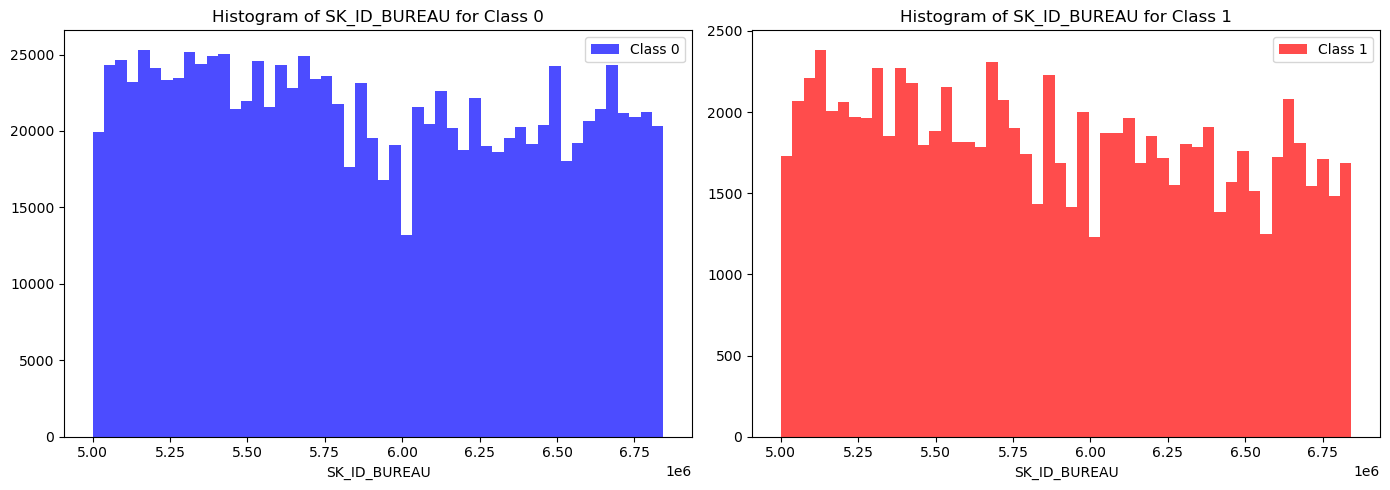

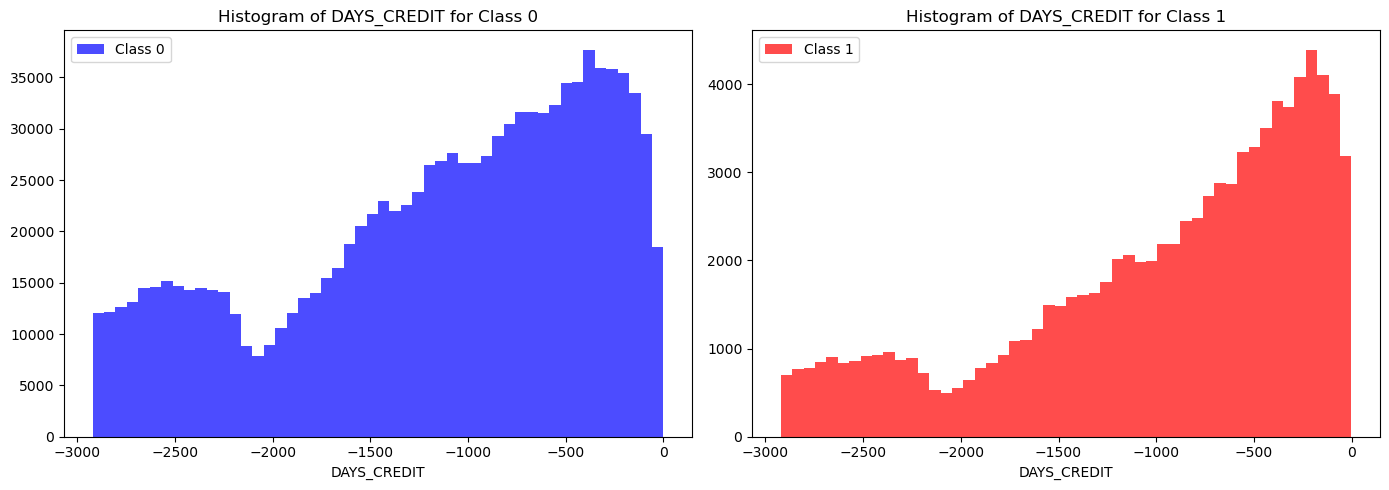

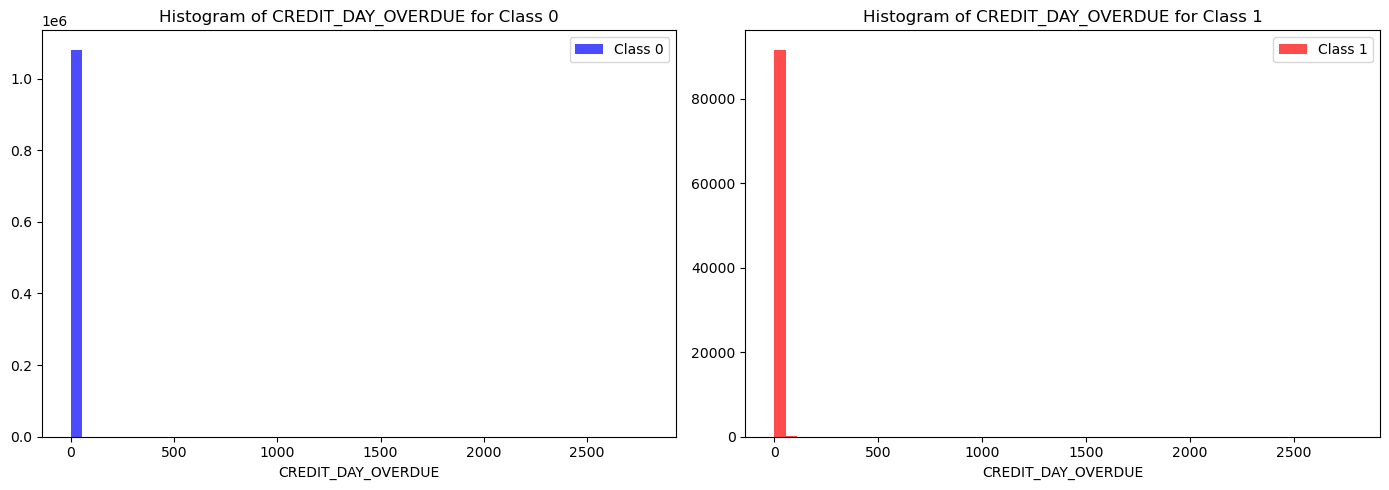

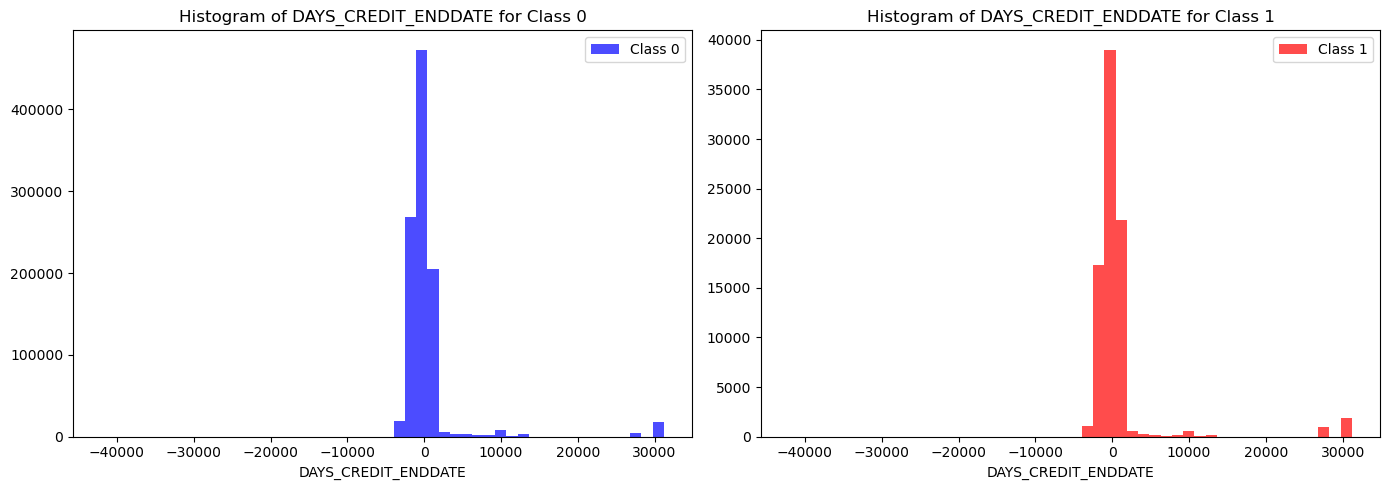

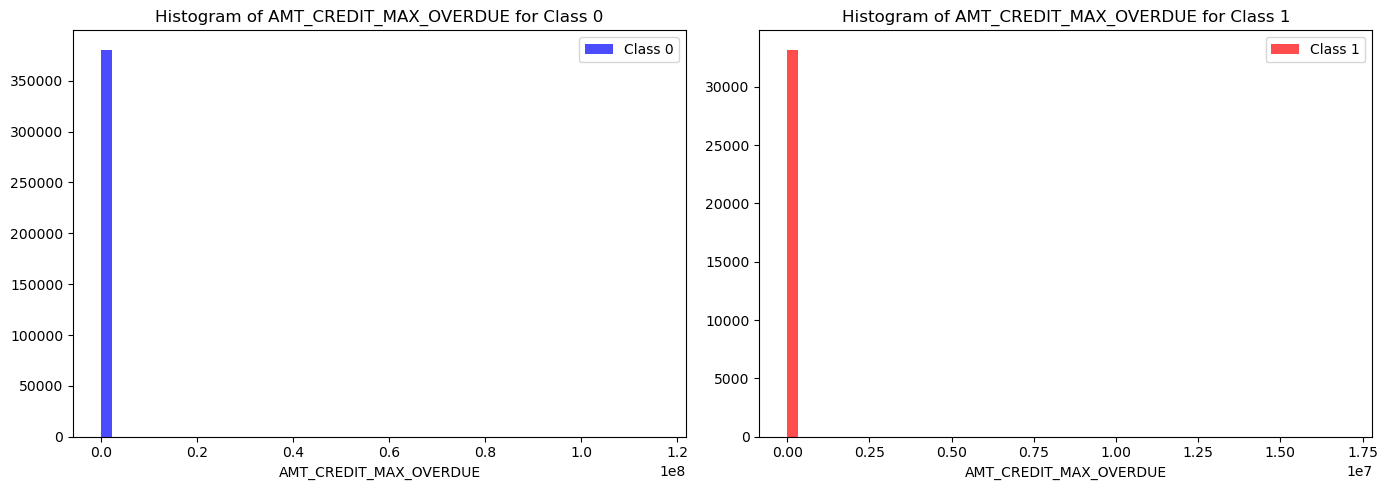

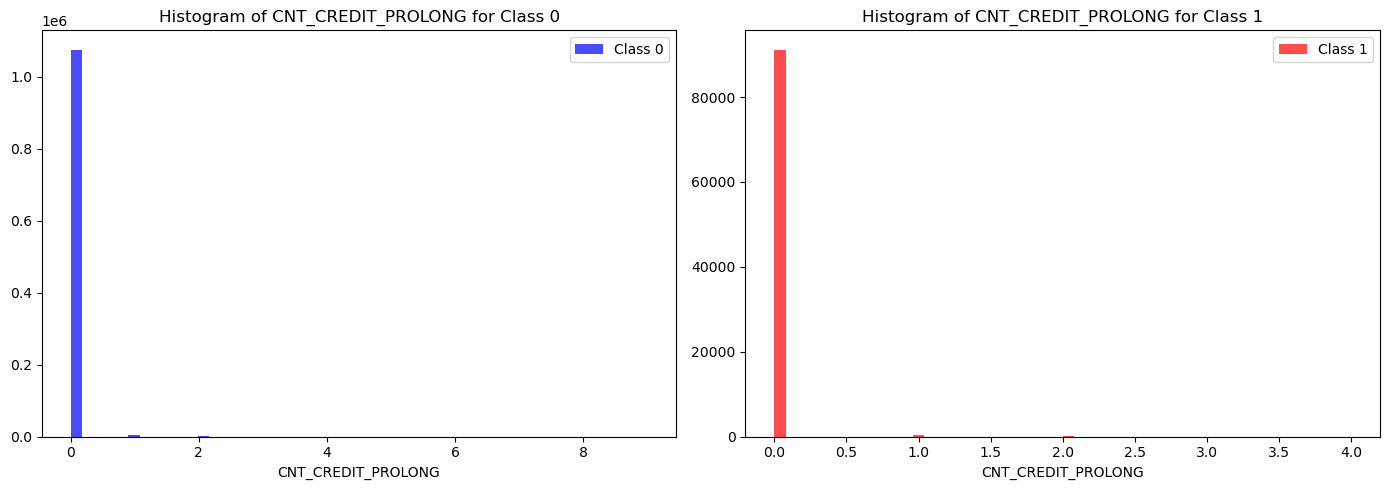

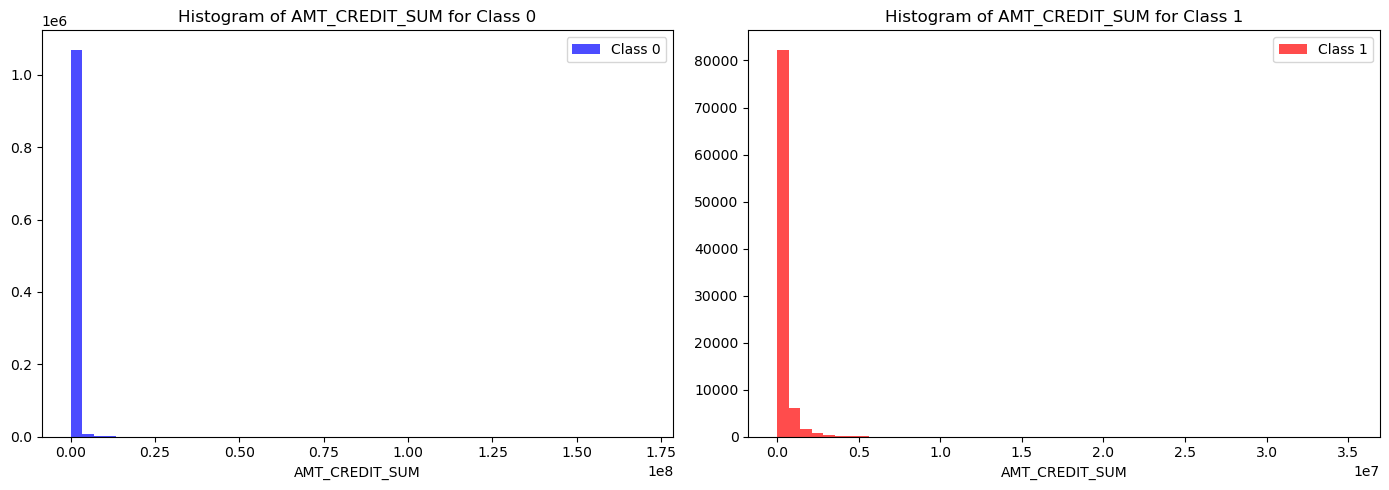

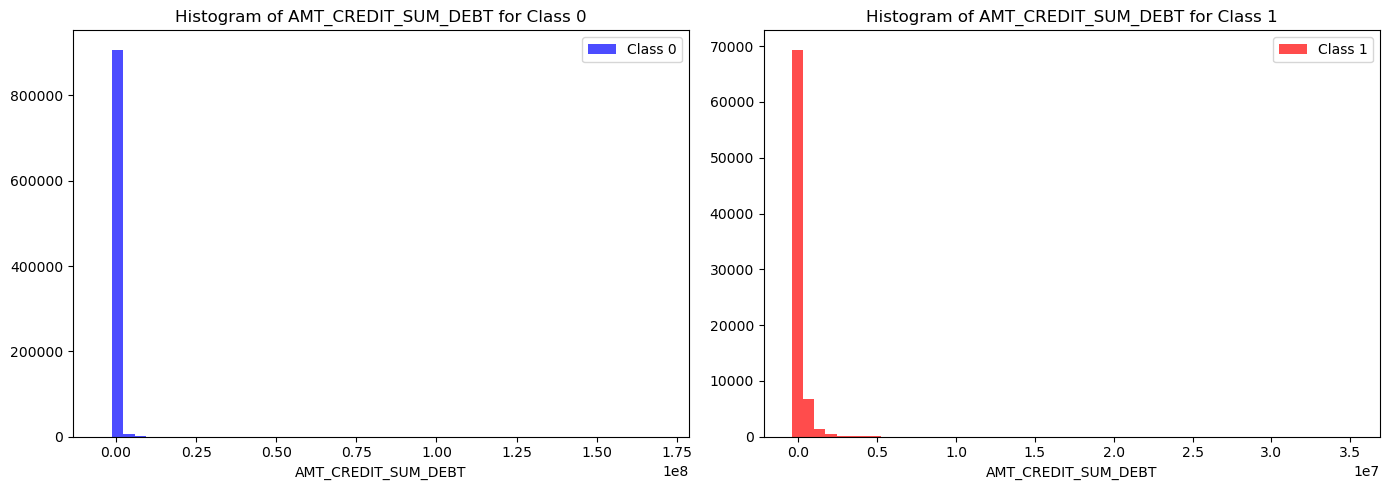

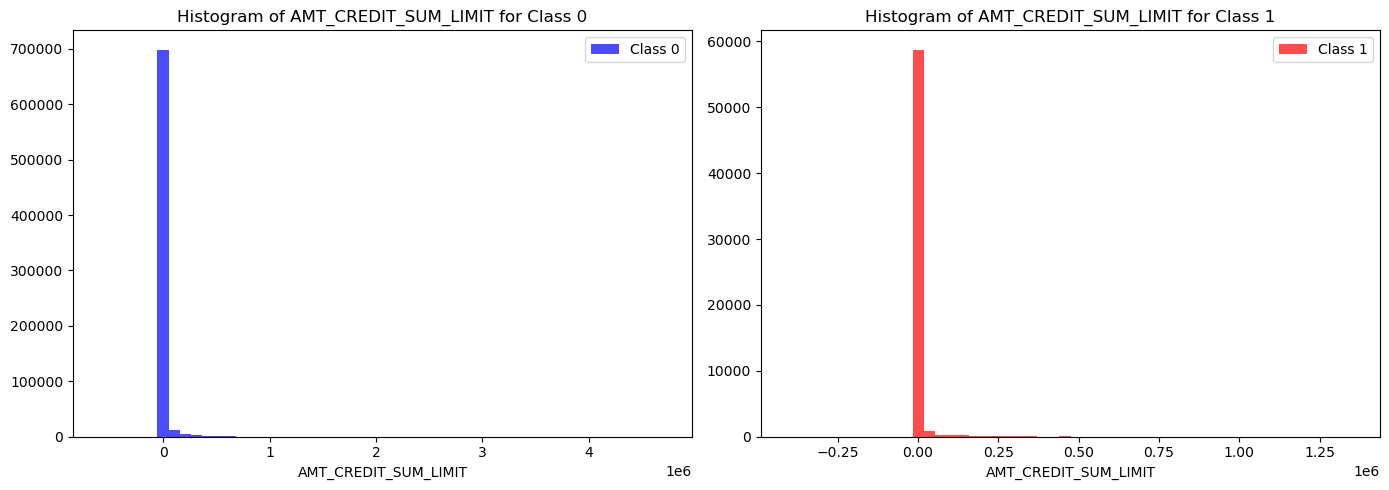

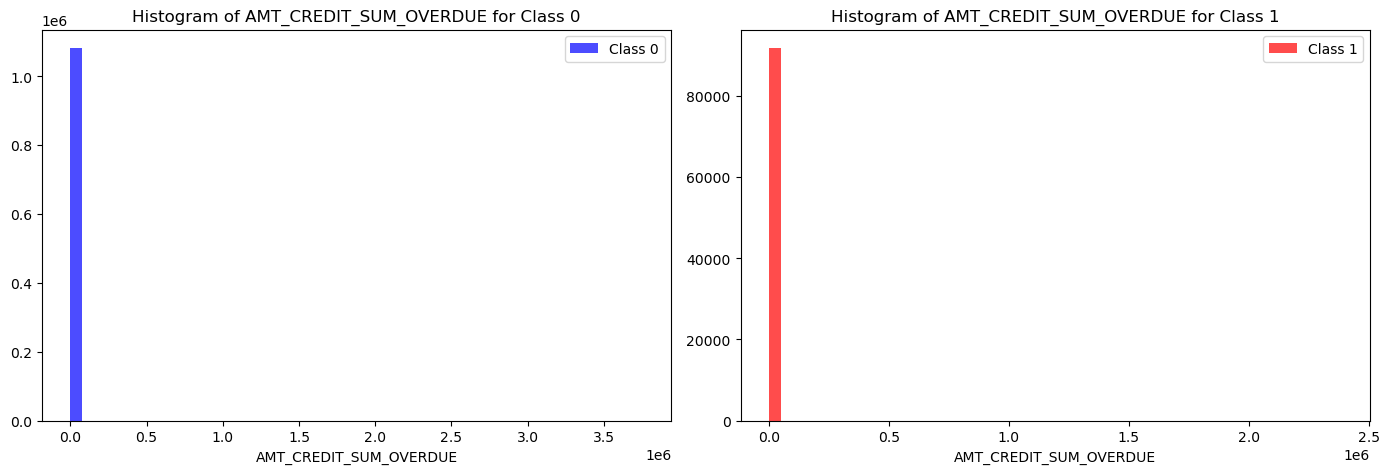

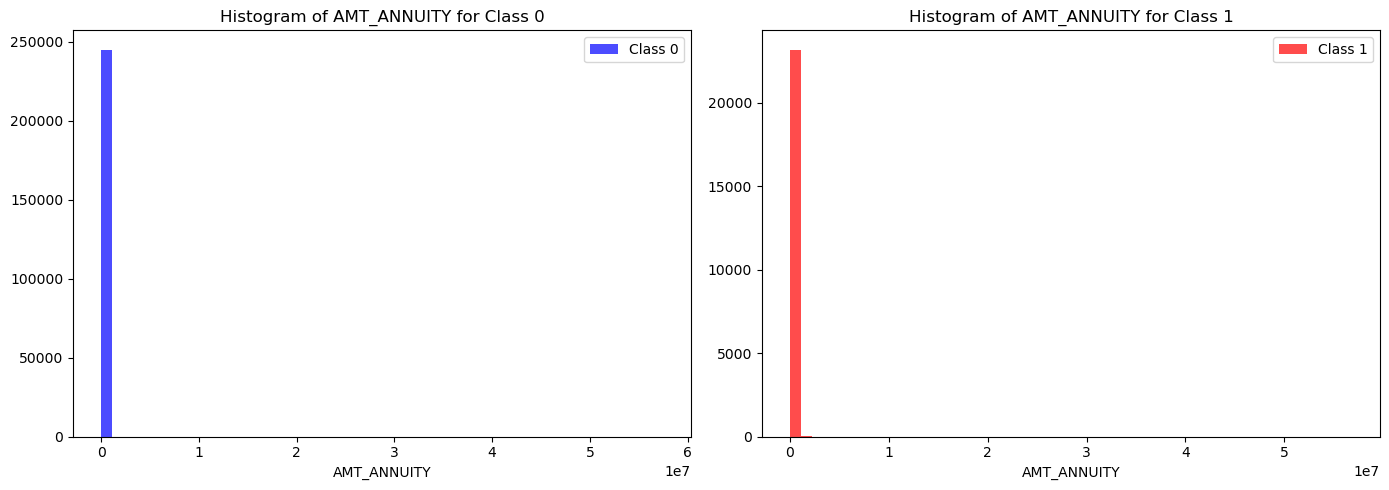

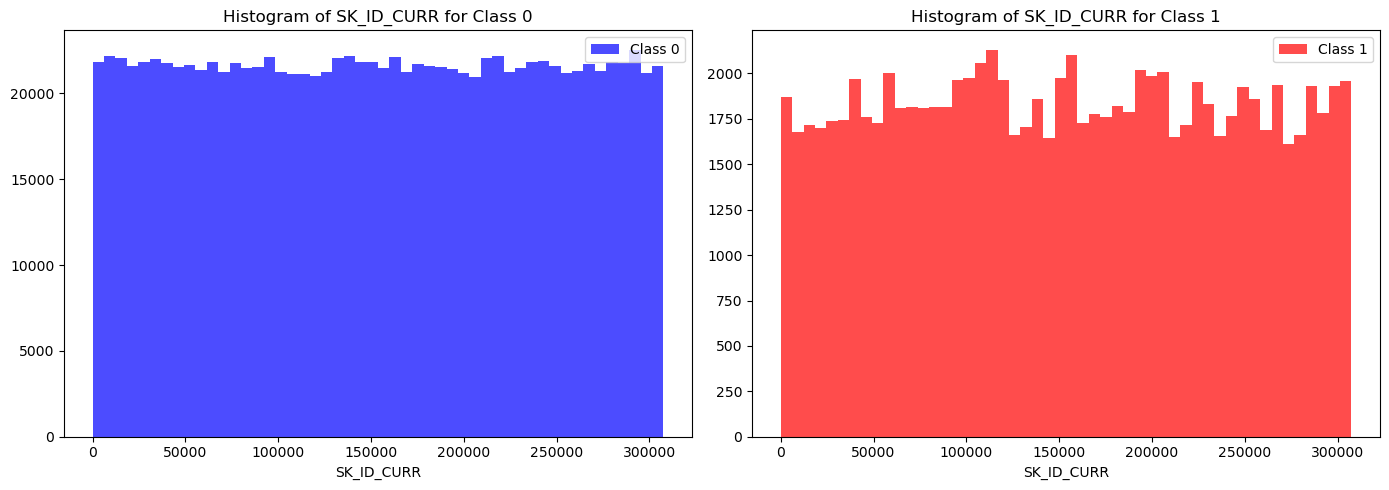

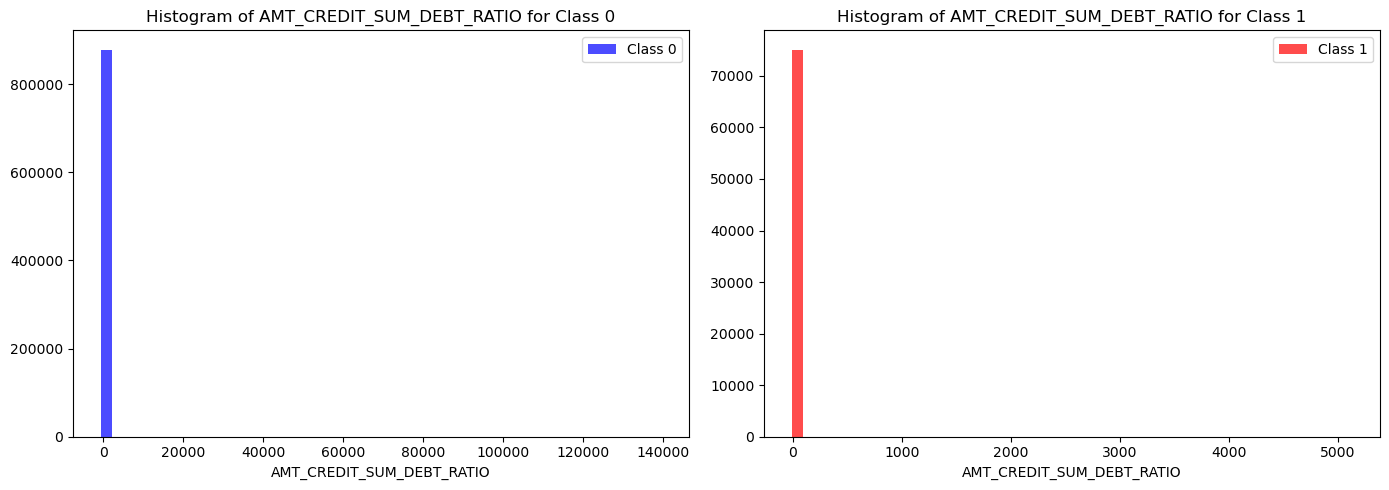

In [85]:
features = ['SK_ID_BUREAU', 'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE',
            'DAYS_CREDIT_ENDDATE', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
            'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
            'AMT_CREDIT_SUM_OVERDUE', 'AMT_ANNUITY', 'SK_ID_CURR',
            'AMT_CREDIT_SUM_DEBT_RATIO']

for feature in features:
    class0 = merge_table[merge_table['TARGET'] == 0][feature]
    class1 = merge_table[merge_table['TARGET'] == 1][feature]

    # Exclude infinite values
    class0 = class0[np.isfinite(class0)]
    class1 = class1[np.isfinite(class1)]

    fig, ax = plt.subplots(1, 2, figsize=(14, 5))

    # Plot histograms
    ax[0].hist(class0, bins=50, alpha=0.7, color='blue', label='Class 0')
    ax[1].hist(class1, bins=50, alpha=0.7, color='red', label='Class 1')

    ax[0].set_title(f'Histogram of {feature} for Class 0')
    ax[1].set_title(f'Histogram of {feature} for Class 1')

    ax[0].set_xlabel(feature)
    ax[1].set_xlabel(feature)

    ax[0].legend()
    ax[1].legend()

    plt.tight_layout()
    plt.show()

Insight 1: 'CREDIT_DAY_OVERDUE', 'AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 'AMT_ANNUITY', 'AMT_CREDIT_SUM_DEBT_RATIO'
The distribution of Class 0 and Class 1 is the same

Insight 2: 'SK_ID_BUREAU', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'SK_ID_CURR'
The difference is apparant but still they're small -> They basically the same

Insight 3: 'DAYS_CREDIT', 'DAYS_CREDIT_ENDDATE'
There is a significant difference between Class 0 and Class 1

But it requires further speculation to decide whether to remove or not

SK_ID_BUREAU: Identifier for each credit bureau record.\
DAYS_CREDIT: Number of days before the current application when the Bureau credit was pulled.\
CREDIT_DAY_OVERDUE: Number of days a consumer credit has been overdue.\
DAYS_CREDIT_ENDDATE: Remaining duration of credit (in days) at the time of pulling Bureau data.\
DAYS_ENDDATE_FACT: Days since the actual end date of the credit, at the time of pulling Bureau data.\
AMT_CREDIT_MAX_OVERDUE: Maximum amount overdue on consumer credit at the time of pulling Bureau data.\
CNT_CREDIT_PROLONG: Number of times the credit was prolonged.\
AMT_CREDIT_SUM: Current credit amount for the Bureau credit.\
AMT_CREDIT_SUM_DEBT: Current debt on Bureau credit.\
AMT_CREDIT_SUM_LIMIT: Current credit limit on Bureau credit.\
AMT_CREDIT_SUM_OVERDUE: Current amount overdue on Bureau credit.\
DAYS_CREDIT_UPDATE: Number of days since the last update of the Bureau credit.\
AMT_ANNUITY: Annuity of the Bureau credit.\
SK_ID_CURR: Identifier for each loan application.